<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入相关的包" data-toc-modified-id="导入相关的包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入相关的包</a></span></li><li><span><a href="#读取油品数据集" data-toc-modified-id="读取油品数据集-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>读取油品数据集</a></span></li><li><span><a href="#将特征根据不同情况分为3类" data-toc-modified-id="将特征根据不同情况分为3类-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>将特征根据不同情况分为3类</a></span></li><li><span><a href="#对特征creat_dt进行补全" data-toc-modified-id="对特征creat_dt进行补全-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>对特征creat_dt进行补全</a></span></li><li><span><a href="#对org_list进行处理" data-toc-modified-id="对org_list进行处理-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>对org_list进行处理</a></span></li><li><span><a href="#变量衍生（重点）" data-toc-modified-id="变量衍生（重点）-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>变量衍生（重点）</a></span></li><li><span><a href="#决策树进行训练" data-toc-modified-id="决策树进行训练-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>决策树进行训练</a></span></li></ul></div>

## 导入相关的包

In [1]:
import pandas as pd
import numpy as np

#消除Warning
import warnings
warnings.filterwarnings("ignore")

## 读取油品数据集

In [2]:
data = pd.read_excel('data/oil_data_for_tree.xlsx')
data.head()

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


这个数据集包含了关于用户加油活动的信息，以下是各个字段的含义：

1. `uid` - 用户唯一标识符，用于识别不同的用户。

2. `oil_actv_dt` - 加油活动日期，表示用户进行加油活动的日期。

3. `create_dt` - 创建日期，表示一些数据记录的创建日期。

4. `total_oil_cnt` - 总加油次数，表示用户总共进行了多少次加油活动。

5. `pay_amount_total` - 支付总金额，表示用户在所有加油活动中支付的总金额。

6. `class_new` - 用户分类，可能表示用户的类型或级别。

7. `bad_ind` - 是否存在不良记录的指示，通常是二进制值（0或1），表示用户是否有不良记录。

8. `oil_amount` - 加油金额，表示每次加油的金额。

9. `discount_amount` - 折扣金额，表示每次加油中的折扣金额。

10. `sale_amount` - 销售金额，表示每次加油中的销售金额。

11. `amount` - 金额，可能是加油活动的总金额。

12. `pay_amount` - 实际支付金额，表示用户实际支付的金额。

13. `coupon_amount` - 优惠券金额，表示每次加油中使用的优惠券金额。

14. `payment_coupon_amount` - 支付优惠券金额，表示每次加油中支付的优惠券金额。

15. `channel_code` - 渠道代码，可能表示用户使用的加油渠道。

16. `oil_code` - 加油类型代码，可能表示用户选择的加油类型。

17. `scene` - 场景，可能表示加油的具体场景或用途。

18. `source_app` - 源应用，表示用户进行加油活动的来源应用程序。

19. `call_source` - 呼叫来源，表示用户的加油活动是通过什么方式或来源发起的。

这些字段提供了有关用户加油行为的详细信息，包括时间、金额、渠道、优惠等信息，可以用于分析用户的加油习惯和行为模式。

查看数据相关信息

In [3]:
data.shape

(50609, 19)

In [4]:
# 下面两种方法均可查看某列的取值集合
data.class_new.unique()
# set(data.class_new)

array(['B', 'E', 'C', 'A', 'D', 'F'], dtype=object)

计算下坏账率

In [5]:
data[data.bad_ind == 1]['bad_ind'].count()/data['bad_ind'].count()

0.01776363887846035

## 将特征根据不同情况分为3类

org_lst 不需要做特殊变换，直接去重

agg_lst 数值型变量做聚合

dstc_lst 文本型变量做 distinct count

In [6]:
#在这里，变量'total_oil_cnt', 'pay_amount_total'没有添加进去，以为他们是聚合后的数据
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

数据重组

In [7]:
#为不改变原数据，可以将原数据copy下来，进行处理
df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()

In [8]:
df.shape

(50609, 17)

看一下缺失值情况

In [9]:
df.isnull().sum()

uid                         0
create_dt                4944
oil_actv_dt                 0
class_new                   0
bad_ind                     0
oil_amount               4944
discount_amount          4944
sale_amount              4944
amount                   4944
pay_amount               4944
coupon_amount            4944
payment_coupon_amount    4946
channel_code                0
oil_code                    0
scene                       0
source_app                  0
call_source                 0
dtype: int64

看一下基础变量的describe

In [10]:
df.describe()

,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
count,50609.000000,45665.000000,4.566500e+04,4.566500e+04,4.566500e+04,4.566500e+04,45665.000000,45663.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000
mean,0.017764,425.376107,1.832017e+05,1.881283e+05,1.808673e+05,9.043344e+05,0.576853,149.395397,1.476378,1.617894,1.906519,0.306072,2.900729
std,0.132093,400.596244,2.007574e+05,2.048742e+05,1.977035e+05,9.885168e+05,0.494064,605.138823,1.511470,3.074166,0.367280,0.893682,0.726231
min,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,175.440000,6.039100e+04,6.200100e+04,5.976100e+04,2.988010e+05,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
50%,0.000000,336.160000,1.229310e+05,1.279240e+05,1.209610e+05,6.048010e+05,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
75%,0.000000,557.600000,2.399050e+05,2.454010e+05,2.360790e+05,1.180391e+06,1.000000,100.000000,1.000000,0.000000,2.000000,0.000000,3.000000
max,1.000000,7952.820000,3.916081e+06,3.996001e+06,3.851081e+06,1.925540e+07,1.000000,50000.000000,6.000000,9.000000,2.000000,3.000000,4.000000


## 对特征creat_dt进行补全

对creat_dt做补全，用oil_actv_dt来填补，并且截取6个月的数据。  
构造变量的时候不能直接对历史所有数据做累加。  
否则随着时间推移，变量分布会有很大的变化。

In [11]:
# 这里对creat_dt做补全，用oil_actv_dt来填补，并且截取6个月的数据。

# 定义一个名为 time_isna 的函数，接受两个参数 x 和 y
def time_isna(x, y):
    # 如果 x 是 'NaT' 字符串（表示不是一个时间戳），则将 x 的值设置为 y
    if str(x) == 'NaT':
        x = y
    else:
        # 如果 x 不是 'NaT'，则保持 x 不变
        x = x
    # 返回 x 的值
    return x

# 将 DataFrame df 根据 'uid' 列升序排列，然后根据 'create_dt' 列降序排列，结果存储在 df2 中
df2 = df.sort_values(['uid', 'create_dt'], ascending=False)

# 使用 apply 函数，将 time_isna 函数逐行应用于 DataFrame，以填充 'create_dt' 列中的缺失值
df2['create_dt'] = df2.apply(lambda x: time_isna(x.create_dt, x.oil_actv_dt), axis=1)

# 计算 'oil_actv_dt' 列和 'create_dt' 列之间的时间差，然后将结果转换为天数，存储在 'dtn' 列中
df2['dtn'] = (df2.oil_actv_dt - df2.create_dt).apply(lambda x: x.days)

# 创建一个新的 DataFrame df，其中包含 'dtn' 列中时间差小于 180 天的行
df = df2[df2['dtn'] < 180]

# 显示新 DataFrame df 的前几行数据
df.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0


In [12]:
# 这里可以看出，筛选掉日期差大于180天的数据后，减少了将近5000左右的数据
df.shape

(45039, 18)

## 对org_list进行处理

对org_list变量求历史贷款天数的最大间隔，并且去重

In [13]:
base = df[org_lst]
base['dtn'] = df['dtn']
base = base.sort_values(by = ['uid','create_dt'],ascending = False)
base = base.drop_duplicates(['uid'],keep = 'first')
#去重后可以看出数据剩下10000个左右
base.shape

(11099, 6)

In [14]:
base.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,0


## 变量衍生（重点）

In [15]:
gn = pd.DataFrame()
for i in agg_lst:
#统计非空次数   
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.where(np.isnan(df[i]),0,1).sum()).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn, tp, on = 'uid',how = 'left')
#统计数值大于0的个数
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.where(df[i]>0,1,0).sum()).reset_index())
    tp.columns = ['uid',i + '_num']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计所有数值的和
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nansum(df[i])).reset_index())
    tp.columns = ['uid',i + '_tot']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计所有数值的均值
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmean(df[i])).reset_index())
    tp.columns = ['uid',i + '_avg']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计所有数值的最大值
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmax(df[i])).reset_index())
    tp.columns = ['uid',i + '_max']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计所有数值的最小值
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_min']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计所有数值的方差
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanvar(df[i])).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计所有数值最大、最小值的差值（极差）
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmax(df[i]) -np.nanmin(df[i]) ).reset_index())
    tp.columns = ['uid',i + '_t']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
#统计变异系数（标准差/均值）
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:max(np.nanvar(df[i])/np.nanmean(df[i]),1)).reset_index())
    tp.columns = ['uid',i + '_tar']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')

对dstc_lst变量求distinct个数

In [16]:
gc = pd.DataFrame()
for i in dstc_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(set(df[i]))).reset_index())
    tp.columns = ['uid',i + '_dstc']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')

将变量组合在一起

In [17]:
fn = pd.merge(base,gn,on= 'uid')
fn = pd.merge(fn,gc,on= 'uid') 
fn.shape

(11099, 74)

缺失值用0 进行填充

In [18]:
fn = fn.fillna(0)

In [19]:
fn.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,dtn,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,...,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_t,payment_coupon_amount_tar,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc
0,B96436391985035703,2018-10-08,2018-10-08,B,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,B96436391984693397,2018-10-11,2018-10-11,E,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,B96436391977217468,2018-10-17,2018-10-17,B,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,B96436391976480892,2018-09-28,2018-09-28,B,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,B96436391972106043,2018-10-19,2018-10-19,A,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


可以将处理后的数据进行保存

In [28]:
fn.to_csv('processing_data.csv',index = False)

In [40]:
m = pd.read_csv('processing_data.csv')
m.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,dtn,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,...,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_t,payment_coupon_amount_tar,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc
0,B96436391985035703,2018-10-08,2018-10-08,B,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,B96436391984693397,2018-10-11,2018-10-11,E,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,B96436391977217468,2018-10-17,2018-10-17,B,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,B96436391976480892,2018-09-28,2018-09-28,B,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,B96436391972106043,2018-10-19,2018-10-19,A,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


## 决策树进行训练

In [29]:
x = fn.drop(['uid','oil_actv_dt','create_dt','bad_ind','class_new'],axis = 1)
y = fn.bad_ind.copy()
from sklearn import tree

dtree = tree.DecisionTreeRegressor(max_depth = 2,min_samples_leaf = 500,min_samples_split = 5000)
dtree = dtree.fit(x,y)

输出决策树图像，并作出决策

In [30]:
import pydotplus 
from IPython.display import Image
from six import StringIO
with open("dt.dot", "w") as f:
    tree.export_graphviz(dtree, out_file=f)
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data,
                         feature_names=x.columns,
                         class_names=['bad_ind'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


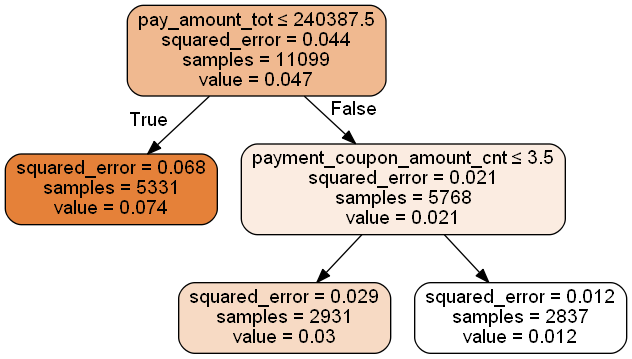

In [31]:
import os
 #这是我自己的路径，注意修改你的路径
os.environ["PATH"] += os.pathsep + r'C:\Users\yhd\PycharmProjects\FinaceAI\规则挖掘\graphviz-2.38\release\bin' 
Image(graph.create_png())

重新计算坏账率

In [32]:
sum(fn.bad_ind)/len(fn.bad_ind)

0.04658077304261645

生成策略

In [33]:
dff1 = fn.loc[(fn.amount_tot>48077.5)&(fn.coupon_amount_cnt>3.5)].copy()
dff1['level'] = 'oil_A'
dff2 = fn.loc[(fn.amount_tot>48077.5)&(fn.coupon_amount_cnt<=3.5)].copy()
dff2['level'] = 'oil_B'
dff3 = fn.loc[(fn.amount_tot<=48077.5)].copy()
dff3['level'] = 'oil_C'

In [34]:
dff1.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,dtn,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,...,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_t,payment_coupon_amount_tar,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc,level
212,A9988361,2018-07-26,2018-08-20,B,0,25,9,9,5502.94,611.437778,...,1.0,0.000000,0.0,1.000000,1,1,1,1,1,oil_A
221,A9960477,2018-07-10,2018-09-21,B,0,73,9,9,1366.50,151.833333,...,0.0,987.654321,100.0,88.888889,1,1,1,1,1,oil_A
232,A9942554,2018-07-31,2018-08-02,B,0,2,27,27,25324.72,937.952593,...,1.0,0.000000,0.0,1.000000,1,1,1,1,1,oil_A
236,A993610,2018-06-15,2018-08-17,B,0,63,5,5,4864.48,972.896000,...,1.0,0.000000,0.0,1.000000,1,1,1,1,2,oil_A
238,A9933539,2018-08-21,2018-08-24,B,0,3,22,22,23705.42,1077.519091,...,1.0,0.000000,0.0,1.000000,1,1,1,1,1,oil_A


In [35]:
dff1 = dff1.append(dff2)
dff1 = dff1.append(dff3)
dff1 = dff1.reset_index(drop = True)
dff1.head()

,uid,create_dt,oil_actv_dt,class_new,bad_ind,dtn,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,...,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_t,payment_coupon_amount_tar,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc,level
0,A9988361,2018-07-26,2018-08-20,B,0,25,9,9,5502.94,611.437778,...,1.0,0.000000,0.0,1.000000,1,1,1,1,1,oil_A
1,A9960477,2018-07-10,2018-09-21,B,0,73,9,9,1366.50,151.833333,...,0.0,987.654321,100.0,88.888889,1,1,1,1,1,oil_A
2,A9942554,2018-07-31,2018-08-02,B,0,2,27,27,25324.72,937.952593,...,1.0,0.000000,0.0,1.000000,1,1,1,1,1,oil_A
3,A993610,2018-06-15,2018-08-17,B,0,63,5,5,4864.48,972.896000,...,1.0,0.000000,0.0,1.000000,1,1,1,1,2,oil_A
4,A9933539,2018-08-21,2018-08-24,B,0,3,22,22,23705.42,1077.519091,...,1.0,0.000000,0.0,1.000000,1,1,1,1,1,oil_A


In [36]:
dff1.shape

(11099, 75)

In [37]:
last = dff1[['class_new','level','bad_ind','uid','oil_actv_dt','bad_ind']].copy()
last['oil_actv_dt'] = last['oil_actv_dt'] .apply(lambda x:str(x)[:7]).copy()
last.head(5)

,class_new,level,bad_ind,uid,oil_actv_dt,bad_ind
0,B,oil_A,0,A9988361,2018-08,0
1,B,oil_A,0,A9960477,2018-09,0
2,B,oil_A,0,A9942554,2018-08,0
3,B,oil_A,0,A993610,2018-08,0
4,B,oil_A,0,A9933539,2018-08,0


In [38]:
last.to_excel('final_report.xlsx',index = False)

In [39]:
fn.to_excel('fina.xlsx',index = False)